In [1]:
import sys
import os

sys.path.insert(0, os.path.join(os.getcwd(), "../src"))
from ml2048.prelude import *

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.path as mpath

from matplotlib.artist import Artist
from matplotlib.axes import Axes
from matplotlib.text import Text
from matplotlib.figure import Figure
from matplotlib.patches import FancyBboxPatch, BoxStyle
from matplotlib.animation import FuncAnimation

import shutil

if shutil.which("ffmpeg") is None:
    # Tell matplotlib where is ffmpeg
    ffmpeg_bin = r"Programs\ffmpeg-master-20231127win64-gpl\bin\ffmpeg.exe"
    mpl.rcParams["animation.ffmpeg_path"] = str(Path.home() / ffmpeg_bin)

In [75]:
"""
progress.dat is generated by long running script, eval_progress.py
"""

data = pickle.loads(Path("../progress.dat").read_bytes())["data"]
print(data.shape)

EPOCHES_PER_SAVE = 100
SAVE_INTERVALS = [9000, 9000, 9000, 9000, 13000, 10000, 10000, 2500, 4000, 2500]
XTICKS = list(itertools.accumulate(SAVE_INTERVALS, initial=0))
# Delete some ticks to keep the graph clear
del XTICKS[-3:-1]

(781, 16)


In [47]:
# see tile 0:4 value
(data[:, 0:4] != 0).any()

False

(0.0, 1.0)

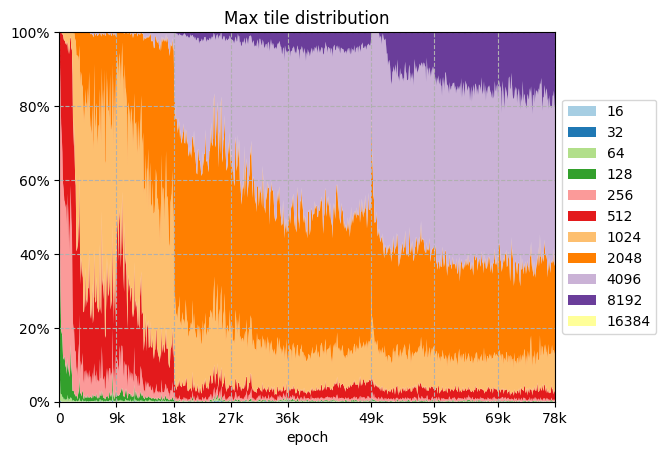

In [101]:
from ml2048.visualization import make_tile_locs, make_tile_styles

TILE_LOCS = make_tile_locs()
TILE_STYLES = make_tile_styles()

min_power = 4  # inclusive, 6 = 32
max_power = 14 + 1  # exclusive, 13 = 8192

epoches = np.arange(0, data.shape[0]) * EPOCHES_PER_SAVE

ax: Axes
fig, ax = plt.subplots()
ax.stackplot(
    epoches,
    data[:, min_power:max_power].T / 1000,
    labels=[str(2**s) for s in range(min_power, max_power)],
    colors=mpl.colormaps["Paired"].colors,
)
ax.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
ax.set_title("Max tile distribution")

ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda s, _: f"{s // 1000}k" if s else "0")
)

ax.set_xticks(XTICKS)
ax.grid(linestyle="--")

ax.set_xlabel("epoch")

ax.set_xlim([0, epoches.max()])
ax.set_ylim([0, 1])